In [18]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('cleaned_adult_data.csv')

In [19]:
df.shape

(30160, 17)

In [20]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,education_age_ratio,work_age_ratio
count,30160.000000,3.016000e+04,30160.000000,30160.00000,30160.000000,30160.000000,30160.000000,30160.000000
mean,38.437500,1.898011e+05,10.121121,1092.00819,88.378349,40.932195,0.294109,61.004710
std,13.134931,1.056527e+05,2.549972,7406.58678,404.311135,11.979301,0.116154,24.607169
min,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000,0.013333,0.675325
25%,28.000000,1.176325e+05,9.000000,0.00000,0.000000,40.000000,0.209302,44.255319
50%,37.000000,1.784300e+05,10.000000,0.00000,0.000000,40.000000,0.281250,57.777778
75%,47.000000,2.376340e+05,13.000000,0.00000,0.000000,45.000000,0.372093,75.636364
max,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000,0.777778,270.947368


In [21]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30160,30160,30160,30160,30160,30160,30160,30160,30160
unique,4,5,7,5,6,5,2,41,2
top,Private,Graduate,Married-civ-spouse,Professional Jobs,Husband,White,Male,United-States,<=50K
freq,22286,12009,14064,12661,12462,25931,20378,27502,22652


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30160 entries, 0 to 30159
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30160 non-null  int64  
 1   workclass            30160 non-null  object 
 2   fnlwgt               30160 non-null  int64  
 3   education            30160 non-null  object 
 4   education_num        30160 non-null  int64  
 5   marital_status       30160 non-null  object 
 6   occupation           30160 non-null  object 
 7   relationship         30160 non-null  object 
 8   race                 30160 non-null  object 
 9   sex                  30160 non-null  object 
 10  capital_gain         30160 non-null  int64  
 11  capital_loss         30160 non-null  int64  
 12  hours_per_week       30160 non-null  int64  
 13  native_country       30160 non-null  object 
 14  income               30160 non-null  object 
 15  education_age_ratio  30160 non-null 

What are the factors affecting a person's income level based on demographic, education, and work-related attributes?

In [23]:
ndf = df.copy()

In [24]:
ndf.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_age_ratio,work_age_ratio
0,38,Private,215646,Graduate,9,Divorced,Skilled Trade,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.236842,54.736842
1,53,Private,234721,School,7,Married-civ-spouse,Skilled Trade,Husband,Black,Male,0,0,40,United-States,<=50K,0.132075,39.245283
2,28,Private,338409,Bachelor,13,Married-civ-spouse,Professional Jobs,Wife,Black,Female,0,0,40,Cuba,<=50K,0.464286,74.285714
3,37,Private,284582,Graduate,14,Married-civ-spouse,Professional Jobs,Wife,White,Female,0,0,40,United-States,<=50K,0.378378,56.216216
4,49,Private,160187,School,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.102041,16.979592
5,52,Self-Employed,209642,Graduate,9,Married-civ-spouse,Professional Jobs,Husband,White,Male,0,0,45,United-States,>50K,0.173077,45.000000
6,31,Private,45781,Graduate,14,Never-married,Professional Jobs,Not-in-family,White,Female,14084,0,50,United-States,>50K,0.451613,83.870968
7,42,Private,159449,Bachelor,13,Married-civ-spouse,Professional Jobs,Husband,White,Male,5178,0,40,United-States,>50K,0.309524,49.523810
8,37,Private,280464,Bachelor,10,Married-civ-spouse,Professional Jobs,Husband,Black,Male,0,0,80,United-States,>50K,0.270270,112.432432
9,30,Government,141297,Bachelor,13,Married-civ-spouse,Professional Jobs,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,0.433333,69.333333


In [25]:
ndf.marital_status.unique()

array([' Divorced', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [26]:
ndf['work_hours_ratio'] = ndf['hours_per_week'] / ndf['hours_per_week'].mean()
ndf['capital_gain_loss_ratio'] = ndf['capital_gain'] / (ndf['capital_loss'] + 1)
ndf['education_age_ratio'] = ndf['education_num'] / ndf['age']
ndf['is_married'] = ndf['marital_status'].apply(lambda x: 0 if x in ['Divorced', 'Never-married', ] else 1)
ndf['is_government_worker'] = ndf['workclass'].apply(lambda x: 1 if x in ['Government', 'Self-Employed'] else 0)
ndf['age_group'] = pd.cut(ndf['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61+'])

In [27]:
ndf.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,education_age_ratio,work_age_ratio,work_hours_ratio,capital_gain_loss_ratio,is_married,is_government_worker,age_group
0,38,Private,215646,Graduate,9,Divorced,Skilled Trade,Not-in-family,White,Male,...,40,United-States,<=50K,0.236842,54.736842,0.977226,0.0,1,0,31-45
1,53,Private,234721,School,7,Married-civ-spouse,Skilled Trade,Husband,Black,Male,...,40,United-States,<=50K,0.132075,39.245283,0.977226,0.0,1,0,46-60
2,28,Private,338409,Bachelor,13,Married-civ-spouse,Professional Jobs,Wife,Black,Female,...,40,Cuba,<=50K,0.464286,74.285714,0.977226,0.0,1,0,18-30
3,37,Private,284582,Graduate,14,Married-civ-spouse,Professional Jobs,Wife,White,Female,...,40,United-States,<=50K,0.378378,56.216216,0.977226,0.0,1,0,31-45
4,49,Private,160187,School,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,16,Jamaica,<=50K,0.102041,16.979592,0.390890,0.0,1,0,46-60
5,52,Self-Employed,209642,Graduate,9,Married-civ-spouse,Professional Jobs,Husband,White,Male,...,45,United-States,>50K,0.173077,45.000000,1.099379,0.0,1,1,46-60
6,31,Private,45781,Graduate,14,Never-married,Professional Jobs,Not-in-family,White,Female,...,50,United-States,>50K,0.451613,83.870968,1.221532,14084.0,1,0,31-45
7,42,Private,159449,Bachelor,13,Married-civ-spouse,Professional Jobs,Husband,White,Male,...,40,United-States,>50K,0.309524,49.523810,0.977226,5178.0,1,0,31-45
8,37,Private,280464,Bachelor,10,Married-civ-spouse,Professional Jobs,Husband,Black,Male,...,80,United-States,>50K,0.270270,112.432432,1.954452,0.0,1,0,31-45
9,30,Government,141297,Bachelor,13,Married-civ-spouse,Professional Jobs,Husband,Asian-Pac-Islander,Male,...,40,India,>50K,0.433333,69.333333,0.977226,0.0,1,1,18-30


In [33]:
ndf = ndf.drop(columns=['fnlwgt'])  # Example: Drop 'fnlwgt' if not needed

# Separate features and target
X = ndf.drop(columns=['income'])
y = ndf['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9048

    accuracy                           1.00      9048
   macro avg       1.00      1.00      1.00      9048
weighted avg       1.00      1.00      1.00      9048

Confusion Matrix:
 [[9048]]
Feature Importances:
                                   feature  importance
0                                     age         0.0
41                 native_country_ Canada         0.0
59                   native_country_ Iran         0.0
58                  native_country_ India         0.0
57                native_country_ Hungary         0.0
..                                    ...         ...
26                marital_status_ Widowed         0.0
25              marital_status_ Separated         0.0
24          marital_status_ Never-married         0.0
23  marital_status_ Married-spouse-absent         0.0
80             native_country_ Yugoslavia    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


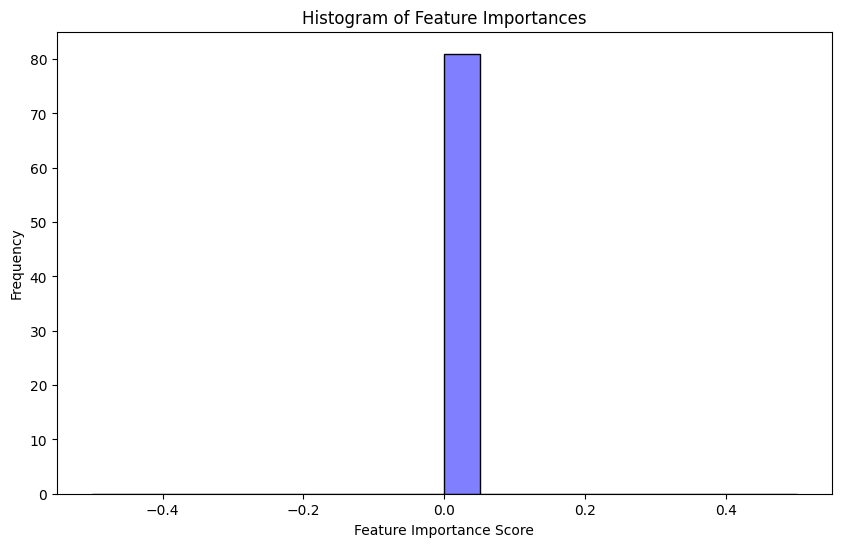

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_df['importance'], bins=20, kde=True, color='blue')
plt.title('Histogram of Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Frequency')
plt.show()

In [36]:
cm = confusion_matrix(y_test, y_pred)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


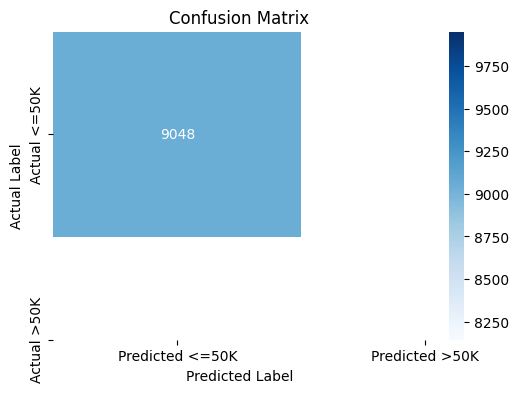

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted <=50K', 'Predicted >50K'], 
            yticklabels=['Actual <=50K', 'Actual >50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()